# Duplicate image finder

In [1]:
import os

if "visualization" in os.getcwd():
    os.chdir("..")

if "notebooks" in os.getcwd():
    os.chdir("..")
os.getcwd()

'/home/jordi/Documents/GitHub/zebra_fish'

In [2]:
import shelve
import imagehash
from PIL import Image
import itertools
import glob
from pathlib import Path
import collections
import matplotlib.pyplot as plt
from src.utils.data import read_image

In [8]:


db = collections.defaultdict(list)
hash_path_tuples = []

for path in glob.glob("dataset/**/*.jpg"):
    path = Path(path)
    
    image = Image.open(path)
    h = imagehash.dhash(image)

    hash_path_tuples.append((h, path))
    


These image are very similiar with HD=4
- dataset/new/BF_0371.jpg
- dataset/new/BF_0401.jpg


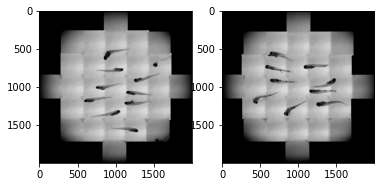

These image are very similiar with HD=3
- dataset/new/BF_0405.jpg
- dataset/new/BF_0401.jpg


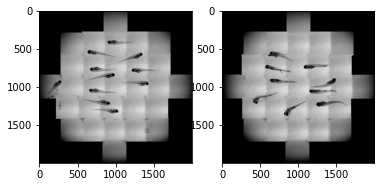

In [9]:
hamming_distance = 4

for (h_one, path_one), (h_other, path_other) in itertools.combinations(hash_path_tuples, r=2):
    if h_one - h_other <= hamming_distance:
        print(f"These image are very similiar with HD={h_one - h_other }")
        print("-", path_one)
        print("-", path_other)
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
        ax1.imshow(read_image(path_one))
        ax2.imshow(read_image(path_other))
        plt.show()